In [1]:
import uxarray as ux
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import logging
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)
logging.warning('is when this event was logged.')

2025-04-16 17:16:27,284 is when this event was logged.


This notebook demonstrates using matplotlib's PolyCollection method to visualize native datasets read in with uxarray. It follows the uxarray user guide: https://uxarray.readthedocs.io/en/latest/user-guide/mpl.html with consideration of the discussion from E3SM documentation: https://acme-climate.atlassian.net/wiki/spaces/DOC/pages/1210023949/Plotting+data+on+SE+native+grid

In [2]:
base_path = "/lcrc/group/e3sm/public_html/"
grid_info = "ne120pg2"
grid_path = base_path + f"diagnostics/grids/{grid_info}.nc"
data_path = base_path + f"e3sm_diags_test_data/native_grid/PRECC.{grid_info}.nc"

logging.info("open datasets with uxarray")
uxds = ux.open_dataset(grid_path, data_path)

2025-04-16 17:16:27,290 open datasets with uxarray


In [3]:
logging.info("convert a UxDataArray containing a face-centered data variable into a matplotlib.collections.PolyCollection instance")
#pc = uxds["PRECC"].squeeze().to_polycollection()
pc = uxds["PRECC"].squeeze().to_polycollection(periodic_elements="split") # option to treat data cross date-time/antimeridian, which will results in 20x performance hit


2025-04-16 17:16:30,162 convert a UxDataArray containing a face-centered data variable into a matplotlib.collections.PolyCollection instance


2025-04-16 17:19:07,693 start creating plot


Text(0.5, 1.0, 'PolyCollection Plot with Projection & Features')

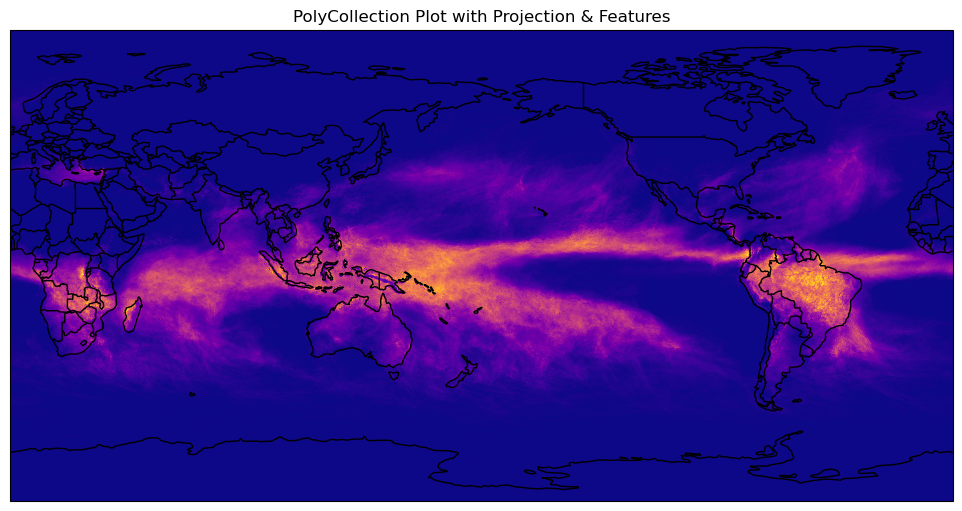

In [4]:
# disables grid lines
pc.set_antialiased(False)

pc.set_cmap("plasma")

logging.info("start creating plot")
fig, ax = plt.subplots(
    1,
    1,
    figsize=(10, 5),
    facecolor="w",
    constrained_layout=True,
    subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)),
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.add_collection(pc)
ax.set_global()
plt.title("PolyCollection Plot with Projection & Features")
#logging.info("save plot in png format")
#plt.savefig(f'/lcrc/group/e3sm/public_html/diagnostic_output/ac.zhang40/tests/PRECC_{grid_info}.png')